In [36]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\20193694\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [37]:
import pandas as pd

In [38]:
andy = pd.read_csv('20231030_8210796956_MiFitness_hlth_center_fitness_data.csv')
tom = pd.read_csv('20231030_8211531339_MiFitness_hlth_center_fitness_data.csv')
huub = pd.read_csv('20231031_8210564343_MiFitness_hlth_center_fitness_data.csv')
oumaima = pd.read_csv('20231101_8210586841_MiFitness_hlth_center_fitness_data.csv')

In [39]:
andy['Person'] = 'andy'
tom['Person'] = 'tom'
huub['Person'] = 'huub'
oumaima['Person'] = 'oumaima'

master_frame = pd.concat([andy, tom, huub, oumaima], ignore_index=True)

In [40]:
master_frame.head()

,Uid,Sid,Key,Time,Value,UpdateTime,Person
0,8210796956,huami.39873/AAAAC13TA75455,pai,1694476800,"{""total_pai"":1.2864055633544922,""high_zone_pai...",1697357015,andy
1,8210796956,huami.39873/AAAAC13TA75455,valid_stand,1694494800,"{""end_time"":1694498400,""start_time"":1694494800}",1695273562,andy
2,8210796956,huami.39873/AAAAC13TA75455,calories,1694496000,"{""time"":1694496000,""calories"":3}",1694604508,andy
3,8210796956,huami.39873/AAAAC13TA75455,steps,1694496180,"{""time"":1694496180,""steps"":8,""distance"":5,""cal...",1694604507,andy
4,8210796956,huami.39873/AAAAC13TA75455,steps,1694496360,"{""time"":1694496360,""steps"":16,""distance"":11,""c...",1694604507,andy


In [41]:
# print(master_frame.columns)
print(master_frame['Key'].unique())


['pai' 'valid_stand' 'calories' 'steps' 'heart_rate' 'intensity' 'dynamic'
 'single_heart_rate' 'single_spo2' 'training_load' 'single_stress'
 'stress' 'watch_night_sleep' 'resting_heart_rate' 'watch_daytime_sleep'
 'weight']


In [78]:
heart_df = master_frame[master_frame['Key'] == 'heart_rate']
heart_df = heart_df.reset_index(drop=True)
# heart_df

heart_df['Value_dict'] = heart_df['Value'].apply(eval)

# Iterate through the keys in the 'Value_dict' column and add them as new columns
for key in heart_df['Value_dict'][0].keys():
    heart_df[key] = heart_df['Value_dict'].apply(lambda x: x.get(key, None))

In [108]:
# Assuming master_frame is your DataFrame

# Get unique values in the 'Key' column
unique_keys = ['pai',
               'valid_stand', 
               'calories',
               'steps',
               'heart_rate',
               'intensity',
               'dynamic',
               'single_heart_rate',
               'single_spo2',
               'training_load',
               'single_stress',
               'stress',
               'watch_night_sleep',
               'resting_heart_rate',
            #    'watch_daytime_sleep',
               'weight']

# Create an empty dictionary to store the sub-dataframes
key_dataframes = {}

# Iterate through unique keys
for key in unique_keys:
    # Create a sub-dataframe for the current key
    key_df = master_frame[master_frame['Key'] == key].reset_index(drop=True)
    
    # Apply eval to 'Value' column and create 'Value_dict' column
    key_df['Value_dict'] = key_df['Value'].apply(eval)
    
    # Iterate through the keys in the 'Value_dict' column and add them as new columns
    for sub_key in key_df['Value_dict'][0].keys():
        key_df[sub_key] = key_df['Value_dict'].apply(lambda x: x.get(sub_key, None))
    
    # Drop the original 'Value_dict' column
    key_df = key_df.drop('Value_dict', axis=1)
    
    # Store the sub-dataframe in the dictionary
    key_dataframes[key] = key_df

# Now key_dataframes is a dictionary containing sub-dataframes for each unique value in the 'Key' column
# You can access each sub-dataframe using key_dataframes['heart_rate'], key_dataframes['steps'], etc.

# Optionally, if you want to have separate variables for each dataframe:
pai_df = key_dataframes['pai']
valid_stand_df = key_dataframes['valid_stand']
calories_df = key_dataframes['calories']
steps_df = key_dataframes['steps']
heart_rate_df = key_dataframes['heart_rate']
intensity_df = key_dataframes['intensity']
dynamic_df = key_dataframes['dynamic']
single_heart_rate_df = key_dataframes['single_heart_rate']
single_spo2_df = key_dataframes['single_spo2']
training_load_df = key_dataframes['training_load']
single_stress_df = key_dataframes['single_stress']
stress_df = key_dataframes['stress']
watch_night_sleep_df = key_dataframes['watch_night_sleep']
resting_heart_rate_df = key_dataframes['resting_heart_rate']
# watch_daytime_sleep_df = key_dataframes['watch_daytime_sleep']
weight_df = key_dataframes['weight']


In [115]:
import json
import pandas as pd

def handle_watch_daytime_sleep(value_dict):
    if 'items' in value_dict:
        items = value_dict['items']
        for item in items:
            if 'ended' in item:
                item['ended'] = str(item['ended'])
    return value_dict


In [117]:
# Assuming master_frame is your DataFrame

# Get unique values in the 'Key' column
unique_keys = ['pai', 'valid_stand', 'calories', 'steps', 'heart_rate', 'intensity', 'dynamic',
               'single_heart_rate', 'single_spo2', 'training_load', 'single_stress',
               'stress', 'watch_night_sleep', 'resting_heart_rate', 'watch_daytime_sleep',
               'weight']

# Create an empty dictionary to store the sub-dataframes
key_dataframes = {}

# Iterate through unique keys
for key in unique_keys:
    # Create a sub-dataframe for the current key
    key_df = master_frame[master_frame['Key'] == key].reset_index(drop=True)
    
    # Apply eval to 'Value' column and create 'Value_dict' column
    key_df['Value_dict'] = key_df['Value'].apply(eval)
    
    # Handle the special case for 'watch_daytime_sleep'
    if key == 'watch_daytime_sleep':
        if 'items' in key_df['Value_dict'][0]:
            items = key_df['Value_dict'][0]['items']
            for item in items:
                if 'ended' in item:
                    del item['ended']
    
    # Iterate through the keys in the 'Value_dict' column and add them as new columns
    for sub_key in key_df['Value_dict'][0].keys():
        key_df[sub_key] = key_df['Value_dict'].apply(lambda x: x.get(sub_key, None))
    
    # Drop the original 'Value_dict' column
    key_df = key_df.drop('Value_dict', axis=1)
    
    # Store the sub-dataframe in the dictionary
    key_dataframes[key] = key_df

# Now key_dataframes is a dictionary containing sub-dataframes for each unique value in the 'Key' column
# You can access each sub-dataframe using key_dataframes['heart_rate'], key_dataframes['steps'], etc.

# Optionally, if you want to have separate variables for each dataframe:
pai_df = key_dataframes['pai']
valid_stand_df = key_dataframes['valid_stand']
calories_df = key_dataframes['calories']
steps_df = key_dataframes['steps']
heart_rate_df = key_dataframes['heart_rate']
intensity_df = key_dataframes['intensity']
dynamic_df = key_dataframes['dynamic']
single_heart_rate_df = key_dataframes['single_heart_rate']
single_spo2_df = key_dataframes['single_spo2']
training_load_df = key_dataframes['training_load']
single_stress_df = key_dataframes['single_stress']
stress_df = key_dataframes['stress']
watch_night_sleep_df = key_dataframes['watch_night_sleep']
resting_heart_rate_df = key_dataframes['resting_heart_rate']
watch_daytime_sleep_df = key_dataframes['watch_daytime_sleep']
weight_df = key_dataframes['weight']





NameError: name 'true' is not defined

In [104]:
watch_daytime_sleep_df


,Uid,Sid,Key,Time,UpdateTime,Person,state,start_time,end_time,ended
0,8.210797e+09,huami.39873/AAAAC13TA75455,watch_daytime_sleep,1.696032e+09,1.696111e+09,andy,3,1696108380,1696110540,True
1,8.210797e+09,huami.39873/AAAAC13TA75455,watch_daytime_sleep,1.696291e+09,1.696370e+09,andy,3,1696367940,1696369740,True
2,8.210797e+09,huami.39873/AAAAC13TA75455,watch_daytime_sleep,1.696982e+09,1.697082e+09,andy,3,1697055660,1697056980,NaN
3,8.211531e+09,huami.39873/AAAAC13TA66375,watch_daytime_sleep,1.696723e+09,1.696803e+09,tom,2,1697056980,1697057100,NaN
4,8.211531e+09,huami.39873/AAAAC13TA66375,watch_daytime_sleep,1.696810e+09,1.696896e+09,tom,3,1697057100,1697057640,NaN
5,8.211531e+09,huami.39873/AAAAC13TA66375,watch_daytime_sleep,1.696982e+09,1.697067e+09,tom,2,1697057640,1697057820,NaN
6,8.211531e+09,huami.39873/AAAAC13TA66375,watch_daytime_sleep,1.697933e+09,1.698014e+09,tom,3,1697057820,1697060280,True
7,8.210564e+09,huami.39871/AAAAC12VN84308,watch_daytime_sleep,1.695946e+09,1.696026e+09,huub,3,1696745460,1696747860,NaN
8,8.210564e+09,huami.39871/AAAAC12VN84308,watch_daytime_sleep,1.696205e+09,1.696286e+09,huub,2,1696747860,1696748220,NaN
9,8.210564e+09,huami.39871/AAAAC12VN84308,watch_daytime_sleep,1.696810e+09,1.696917e+09,huub,3,1696748220,1696749000,NaN


In [43]:
variables_key = master_frame['Key'].unique()

# Create data frame for each key separately 
dataframes = {}

for var in variables_key:
    dataframes[var] = master_frame[master_frame['Key'] == var]

for var in variables_key:
    exec(f"{var}_df = master_frame[master_frame['Key'] == '{var}']")

In [44]:
import json

for var in variables_key:
    # Access the dataframe via the exec method
    df_name = f"{var}_df"
    df = eval(df_name)

    # Normalize the 'Value' column using json.loads() and join with the main dataframe
    expanded_columns = pd.json_normalize(df['Value'].apply(json.loads))

    # Join with the expanded_columns
    df = df.join(expanded_columns)

    # Update the dataframe
    exec(f"{df_name} = df")


In [45]:
steps_df['Value'].iloc[0]

'{"time":1694496180,"steps":8,"distance":5,"calories":0.22216962}'

In [46]:
steps_df.iloc[0]

Uid                                                  8210796956
Sid                                  huami.39873/AAAAC13TA75455
Key                                                       steps
Time                                                 1694496180
Value         {"time":1694496180,"steps":8,"distance":5,"cal...
UpdateTime                                           1694604507
Person                                                     andy
time                                               1694496480.0
steps                                                      67.0
distance                                                   48.0
calories                                               1.860671
Name: 3, dtype: object

In [47]:
steps_df[:5]

,Uid,Sid,Key,Time,Value,UpdateTime,Person,time,steps,distance,calories
3,8210796956,huami.39873/AAAAC13TA75455,steps,1694496180,"{""time"":1694496180,""steps"":8,""distance"":5,""cal...",1694604507,andy,1.694496e+09,67.0,48.0,1.860671
4,8210796956,huami.39873/AAAAC13TA75455,steps,1694496360,"{""time"":1694496360,""steps"":16,""distance"":11,""c...",1694604507,andy,1.694497e+09,4.0,2.0,0.111085
5,8210796956,huami.39873/AAAAC13TA75455,steps,1694496420,"{""time"":1694496420,""steps"":20,""distance"":14,""c...",1694604507,andy,1.694497e+09,64.0,46.0,1.777357
6,8210796956,huami.39873/AAAAC13TA75455,steps,1694496480,"{""time"":1694496480,""steps"":67,""distance"":48,""c...",1694604507,andy,1.694497e+09,110.0,79.0,3.054832
7,8210796956,huami.39873/AAAAC13TA75455,steps,1694496540,"{""time"":1694496540,""steps"":4,""distance"":2,""cal...",1694604507,andy,1.694497e+09,38.0,27.0,1.055306


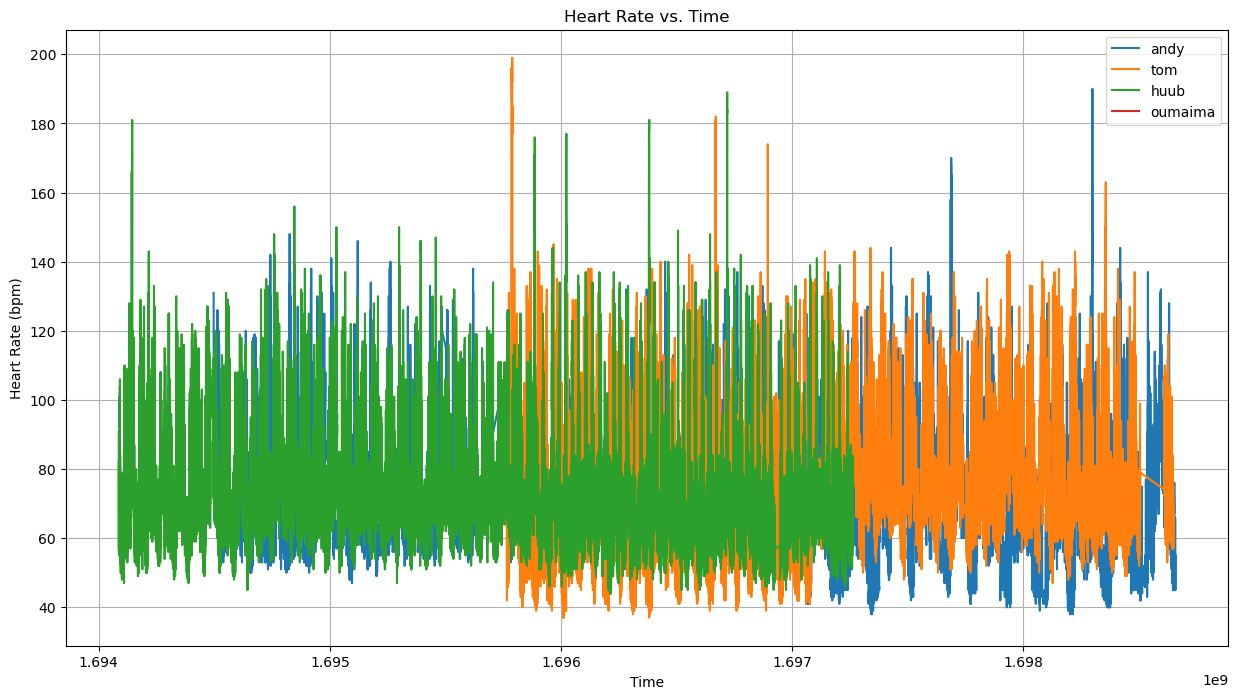

In [8]:
import matplotlib.pyplot as plt

# Set of unique persons
persons = heart_rate_df['Person'].unique()

# Create a plot
plt.figure(figsize=(15, 8))

# For each person, plot their data
for person in persons:
    person_data = heart_rate_df[heart_rate_df['Person'] == person]
    plt.plot(person_data['Time'], person_data['bpm'], label=person)

plt.title('Heart Rate vs. Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate (bpm)')
plt.legend()
plt.grid(True)
plt.show()


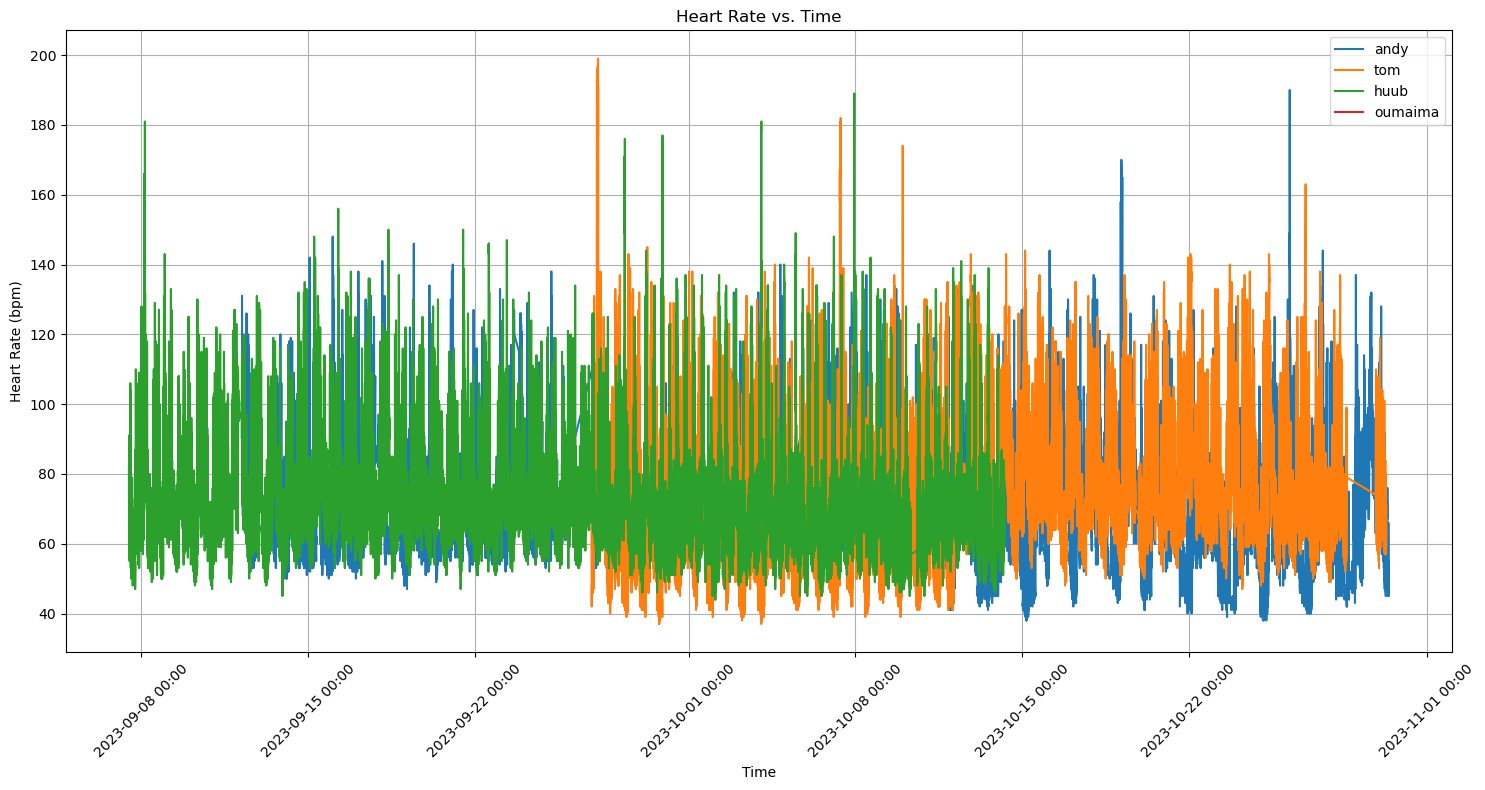

In [9]:
heart_rate_df['DateTime'] = pd.to_datetime(heart_rate_df['Time'], unit='s')
import matplotlib.dates as mdates

plt.figure(figsize=(15, 8))

# For each person, plot their data
for person in persons:
    person_data = heart_rate_df[heart_rate_df['Person'] == person]
    plt.plot(person_data['DateTime'], person_data['bpm'], label=person)

# Formatting the x-axis
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.title('Heart Rate vs. Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate (bpm)')
plt.tight_layout()  # To ensure labels fit
plt.legend()
plt.grid(True)
plt.show()


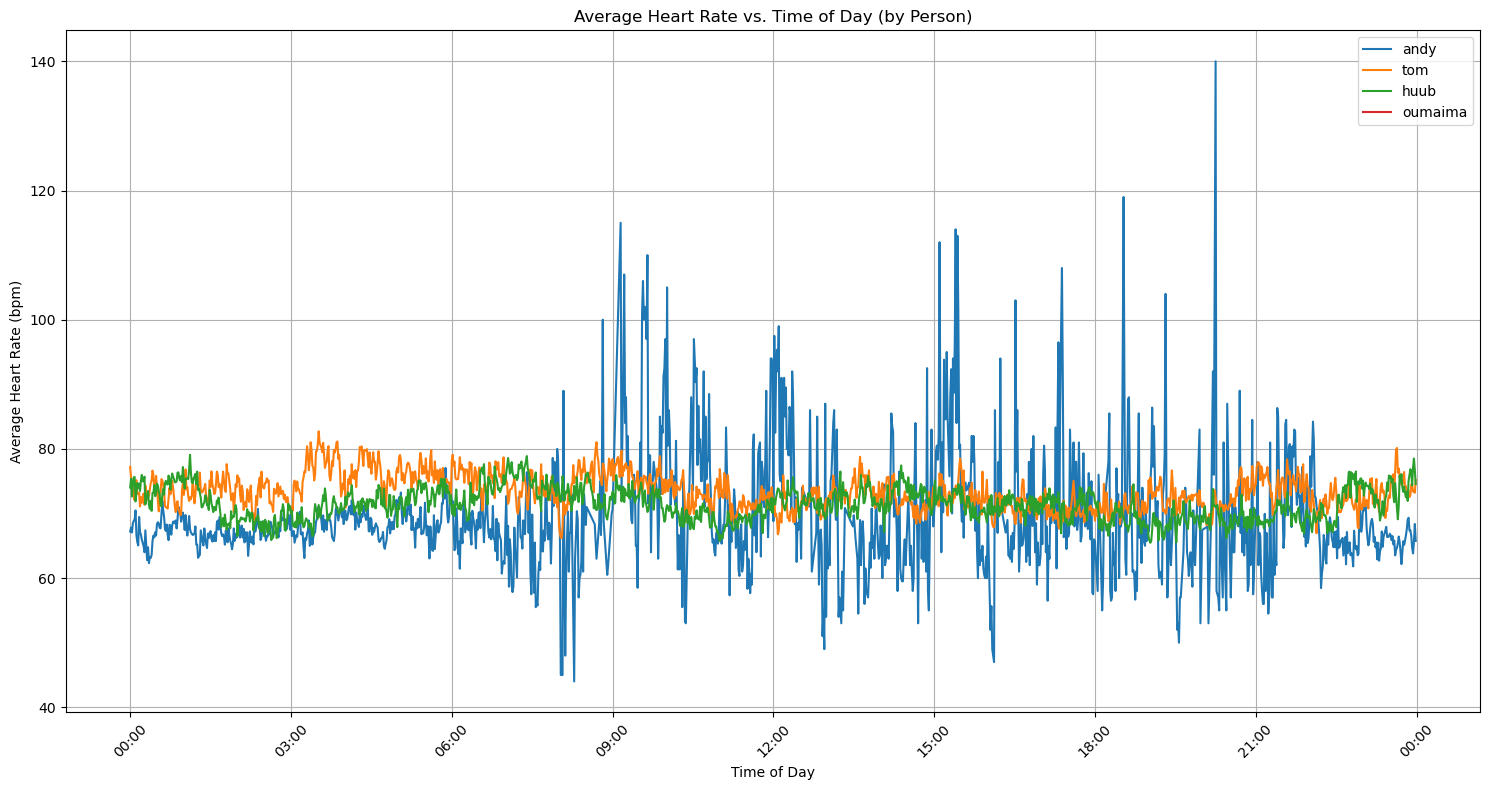

In [10]:
heart_rate_df['Hour'] = heart_rate_df['DateTime'].dt.hour
heart_rate_df['Minute'] = heart_rate_df['DateTime'].dt.minute
avg_heart_rate_per_person = heart_rate_df.groupby(['Person', 'Hour', 'Minute'])['bpm'].mean().reset_index()

avg_heart_rate_per_person['TimeOfDay'] = pd.to_datetime('2000-01-01 ' + avg_heart_rate_per_person['Hour'].astype(str) + ':' + avg_heart_rate_per_person['Minute'].astype(str))

plt.figure(figsize=(15, 8))

# For each person, plot their average heart rate
for person in persons:
    person_data = avg_heart_rate_per_person[avg_heart_rate_per_person['Person'] == person]
    plt.plot(person_data['TimeOfDay'], person_data['bpm'], label=person)

# Formatting the x-axis
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)

plt.title('Average Heart Rate vs. Time of Day (by Person)')
plt.xlabel('Time of Day')
plt.ylabel('Average Heart Rate (bpm)')
plt.tight_layout()  # To ensure labels fit
plt.legend()
plt.grid(True)
plt.show()


# Intuition

I think we need to include control variables such as the number of hours sleep and the quality of sleep as this significantly influences your mental state after awaking.

I guess we can check whether someone has slept after their alarm right?

We must include variable for smart alarm or not. Can we find this in the settings from the mi band?